In [31]:
#%matplotlib inline
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib
from itertools import cycle
from util_kw import upper_caste_keywords, lower_caste_keywords, neutral_keywords, negative_aspect

In [2]:
def add_to_graph(word, assoclist, graph):
    graph.add_node(word)
    for wtuple in assoclist:
        kword, kweight = wtuple
        graph.add_node(kword)
        graph.add_edge(word, kword, weight=kweight)
        
def recurse_add_(word, wvmodel, graph, depth=1, topn=5):
    if depth==1:
        # call add_to_graph and return
        alist = wvmodel.most_similar(word, topn=topn)
        add_to_graph(word, alist, graph)
        return
    else:
        # generate wordlist, then call recurse_add_ with each word in wordlist, with depth-1
        alist = wvmodel.most_similar(word, topn=topn)
        for wtuple in alist:
            aword, _ = wtuple
            recurse_add_(aword, wvmodel, graph, depth=depth-1, topn=topn)

In [3]:
path_models = './word2vec_models'

In [4]:
wvm = Word2Vec.load(path_models+'/'+'IN-indianexpress-india_with_phraser').wv

In [5]:
vocab = wvm.vocab
all_words = [x for x in vocab.keys()]

In [32]:
g1 = nx.Graph()
for word in negative_aspect + lower_caste_keywords:
    if word in all_words:
        recurse_add_(word, wvm, g1, depth=1, topn=4)
    else:
        print ("Word "+word+" not found.")

In [33]:
plt.rcParams["figure.figsize"] = (30,18)
#font = {'weight' : 'bold', 'size'   : 10}
#matplotlib.rc('font', **font)
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 

In [34]:
topics = [x for x in nx.connected_component_subgraphs(g1)]
print (len(topics))

10


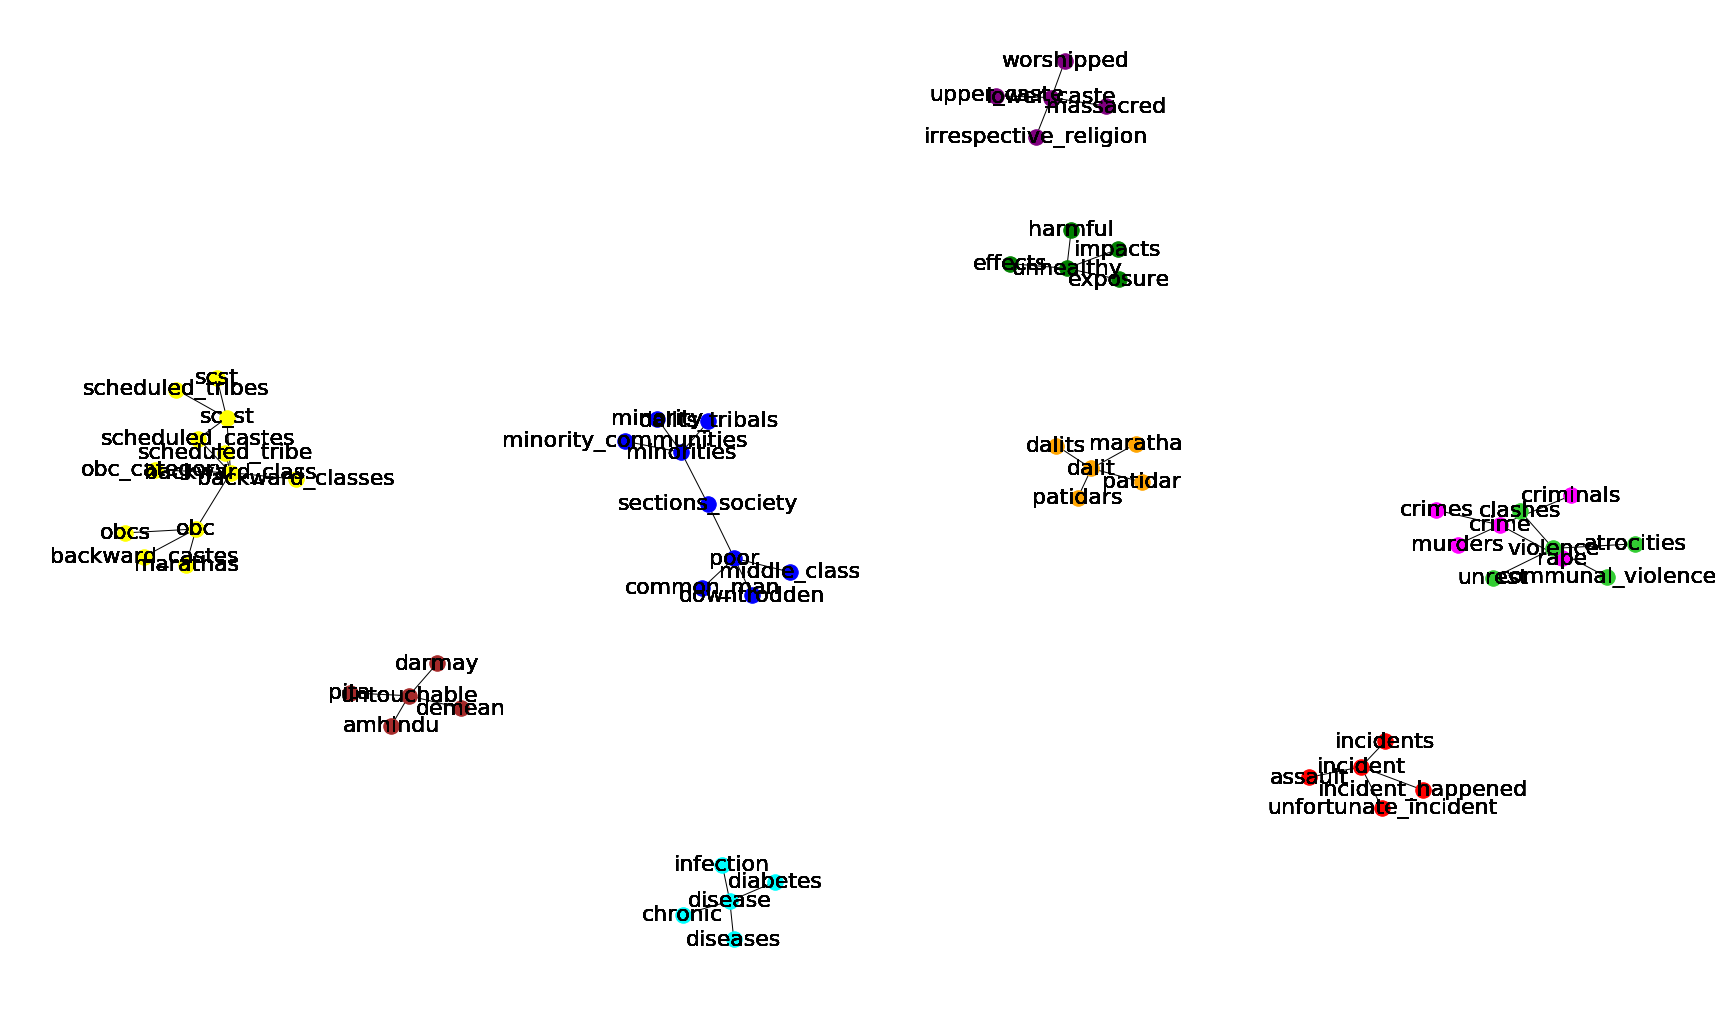

In [35]:
#pos=nx.spring_layout(g1)
pos=nx.spring_layout(g1)
colors = cycle(iter(['red', 'blue', 'green', 'yellow', 'magenta', 'cyan', 'orange', 'limegreen', 'purple', 'brown', 'gray']))
for gt1 in topics:
    #nx.draw(gt1, with_labels=True)
    labels=nx.draw_networkx_labels(g1,pos=pos, font_size=22)
    nx.draw(gt1,pos,node_color=colors.next(),node_size=240)#, labels=labels)
    
plt.show()